In [30]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_18_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import uproot
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle, TFile
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree, gDirectory
import os
import matplotlib.patches as mpatches
import scipy.stats as stats


In [51]:
# energy_array=np.arange(16.0,21.5,0.5)
energy_array=[19.0]

nuAngles_38_tree


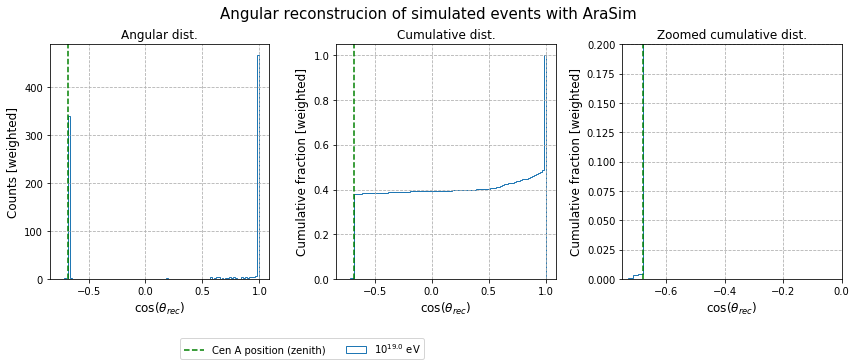

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for energy in energy_array:
    f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraSim/outputs/nuAngles_%0.1f.root"%energy)
    tree = f.Get('nuAngles_%0.0f_tree'% int(energy*2))
    print('nuAngles_%0.0f_tree'%int(energy*2))

    test=[]
    ang_forHist=[]
    nuWeights=[]
#     ang_cutoff=[]
    
    for event in range(tree.GetEntries()):
        tree.GetEntry(event)
        ang_forHist.append(np.degrees(tree.costheta))
        test.append(tree.phi)
        nuWeights.append(tree.weight)

#         if (np.degrees(tree.theta-np.pi/2)<-25):
#             ang_cutoff.append(np.degrees(tree.theta-np.pi/2))
    # plt.hist(np.cos(ang_forHist), bins=1000, density=True);
    # plt.ylim(0,5)
#     numBins=int(tree.GetEntries()/60)
    numBins=100

    axes[0].hist(np.cos(np.deg2rad(ang_forHist)),weights=nuWeights, range=(-0.75, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False);
    axes[1].hist(np.cos(np.deg2rad(ang_forHist)),weights=nuWeights, range=(-0.75, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True);
    axes[2].hist(np.cos(np.deg2rad(ang_forHist)),weights=nuWeights, range=(-0.75, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True, label="$10^{%0.1f} $ eV" %energy);

# axes[1].set_title("Histogram of $\cos(\\theta_{rec})$", fontsize=12)
axes[0].axvline(-0.68, linestyle='--', color="green",label="Cen A position (zenith)")
axes[1].axvline(-0.68, linestyle='--', color="green")
axes[2].axvline(-0.68, linestyle='--', color="green")


axes[0].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)
axes[1].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)
axes[2].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)

axes[0].set_ylabel("Counts [weighted]", fontsize=12)
axes[1].set_ylabel("Cumulative fraction [weighted]", fontsize=12)
axes[2].set_ylabel("Cumulative fraction [weighted]", fontsize=12)

# axes[0].set_yscale("log")
# axes[1].set_ylim(5E-2, 1E1)
axes[0].grid(linestyle='--', linewidth=0.8)
axes[1].grid(linestyle='--', linewidth=0.8)
axes[2].grid(linestyle='--', linewidth=0.8)

axes[2].set_xlim(-0.75,0)
axes[2].set_ylim(0,0.2)
axes[0].set_title("Angular dist.")
axes[1].set_title("Cumulative dist.")
axes[2].set_title("Zoomed cumulative dist.")

fig.legend(ncol=6, loc=(0.21,0.01))




    # axes[1].set_ylim(0,0.01)

    # axes[1].set_yscale('log')
    # plt.legend()
fig.suptitle("Angular reconstrucion of simulated events with AraSim", fontsize=15)
fig.tight_layout(rect=[0, 0.09, 1, 0.95])
# fig.savefig("theta_rec_distro_CenA.png", dpi=200)

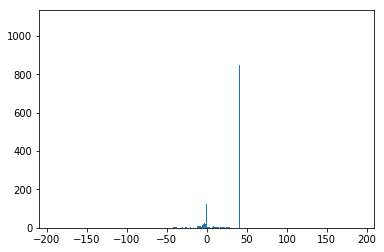

In [56]:
plt.hist(test, bins=500, range=(-190,190));